# VISA OFLC DATA ANALYSIS PROJECT

### 1. Problem statement <br> 
- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.<br> 
- As in last year the count of employees were huge so OFLC needs Machine Learning models to shortlist visa applicants based on their previous data.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# reading dataset
df = pd.read_csv("Visadataset.csv")
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [3]:
# getting rows and columns
df.shape

(25480, 12)

In [4]:
# getting the column names
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
# getting the dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# getting the datatype of the columns
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [7]:
# getting null values result
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
# pip install missingno

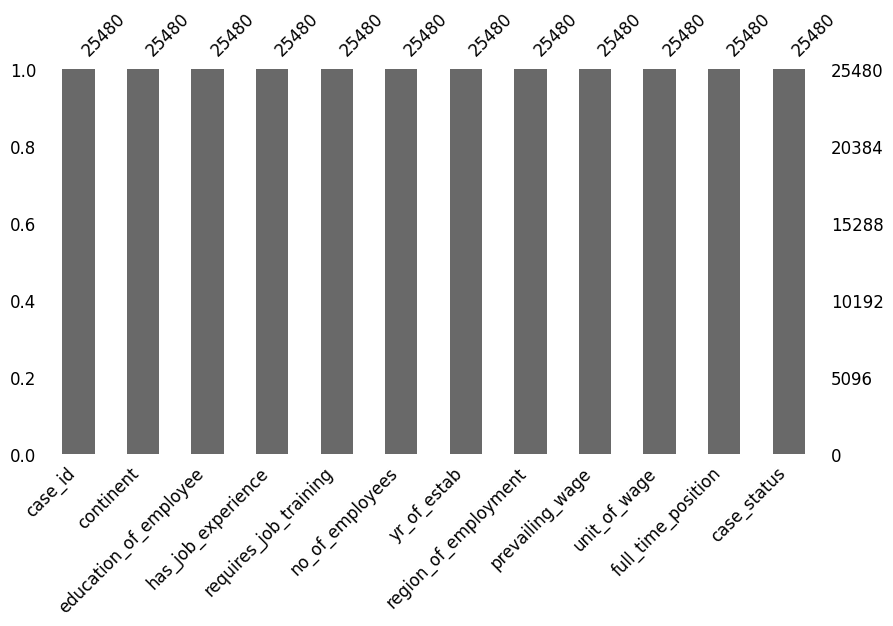

In [9]:
import missingno
missingno.bar(df, figsize=(10,5), fontsize=12);

In [10]:
# getting statistical summary
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# In-depth dataset exploration

In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
# separating numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [14]:
# proportion of count data on numerical columns
for col in numerical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("------------------------------")

no_of_employees
183      0.070644
854      0.062794
724      0.062794
766      0.058870
1476     0.058870
           ...   
5876     0.003925
5536     0.003925
47866    0.003925
4700     0.003925
40224    0.003925
Name: proportion, Length: 7105, dtype: float64
------------------------------
yr_of_estab
1998    4.450549
2005    4.124804
2001    3.991366
2007    3.901099
1999    3.414443
          ...   
1842    0.023548
1846    0.015699
1822    0.015699
1810    0.011774
1824    0.007849
Name: proportion, Length: 199, dtype: float64
------------------------------
prevailing_wage
82560.2800     0.007849
122.6500       0.007849
60948.1500     0.007849
64357.5800     0.007849
108.1200       0.007849
                 ...   
25713.9800     0.003925
101656.6400    0.003925
65665.5500     0.003925
50.8813        0.003925
70876.9100     0.003925
Name: proportion, Length: 25454, dtype: float64
------------------------------


In [15]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
------------------------------
region_of_employment

## insights
- **case_id** : have unique values for each columns, so it can be dropped. <br>
- **continent** : column is highly biased towards asia, hence combine other smaller categories to form single category. <br> 
- **unit of wage** : seems to be an important column as most of them are yearly contracts.

# Univariate Analysis

## Numerical_features

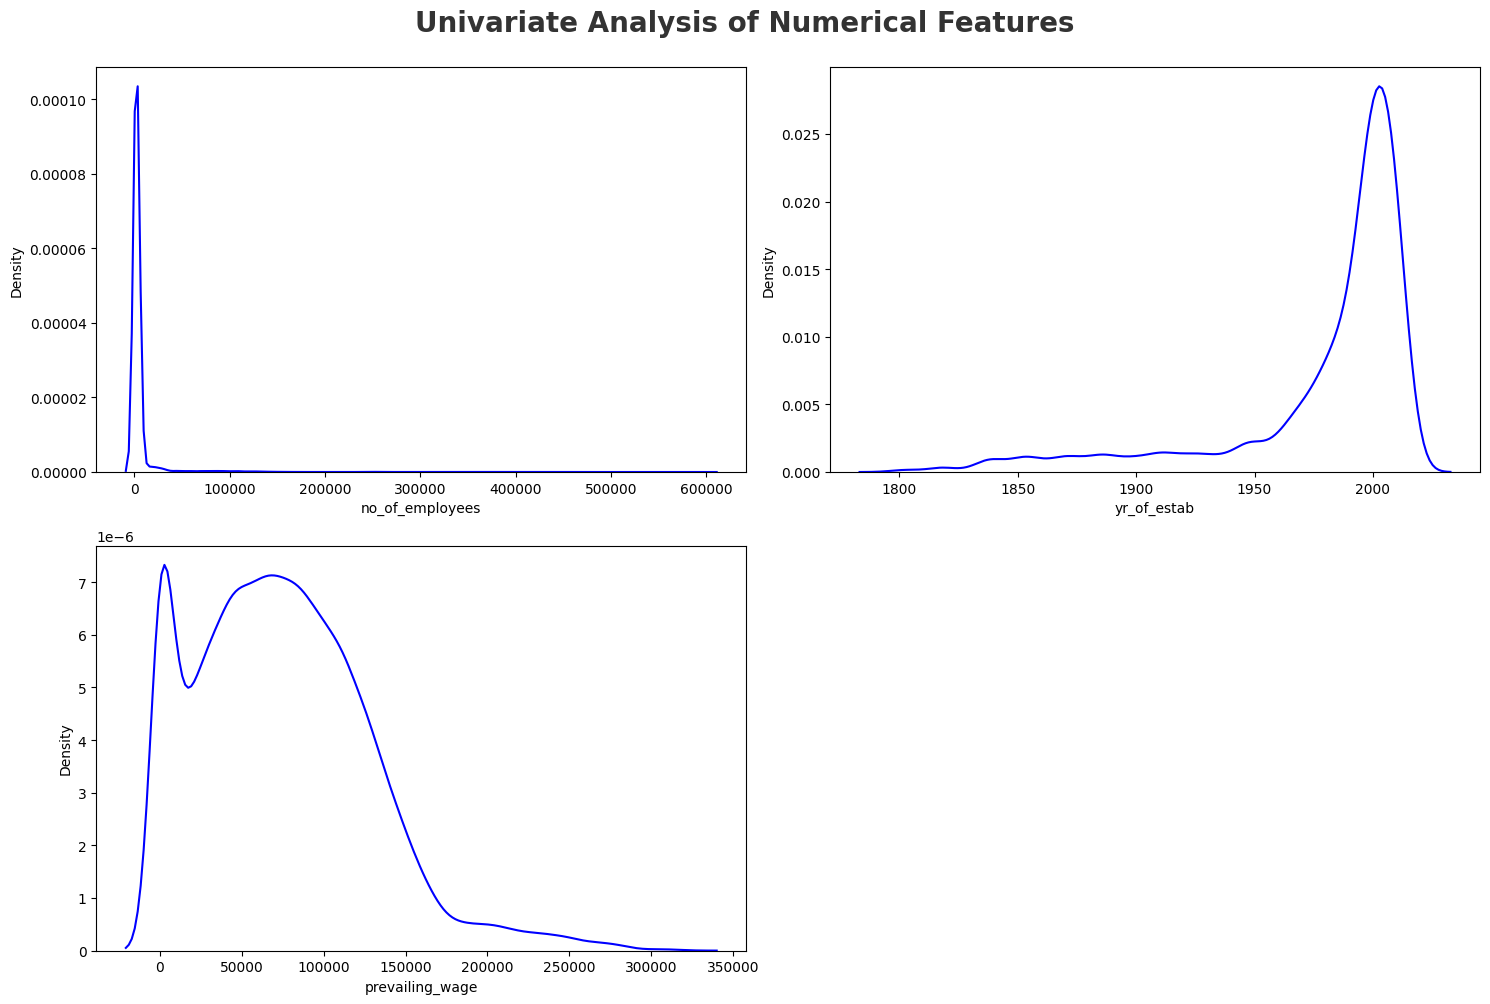

In [16]:
plt.figure(figsize=(15, 10))

plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    
# plt.savefig("path where to save")

## insights
- **no_of_employees** : data is skewed, high chance of having outliers. <br>
- **yr_of_estab** : data is discrete. <br> 
- **prevailing_wage** : data is right skewed.

## Categorical_features

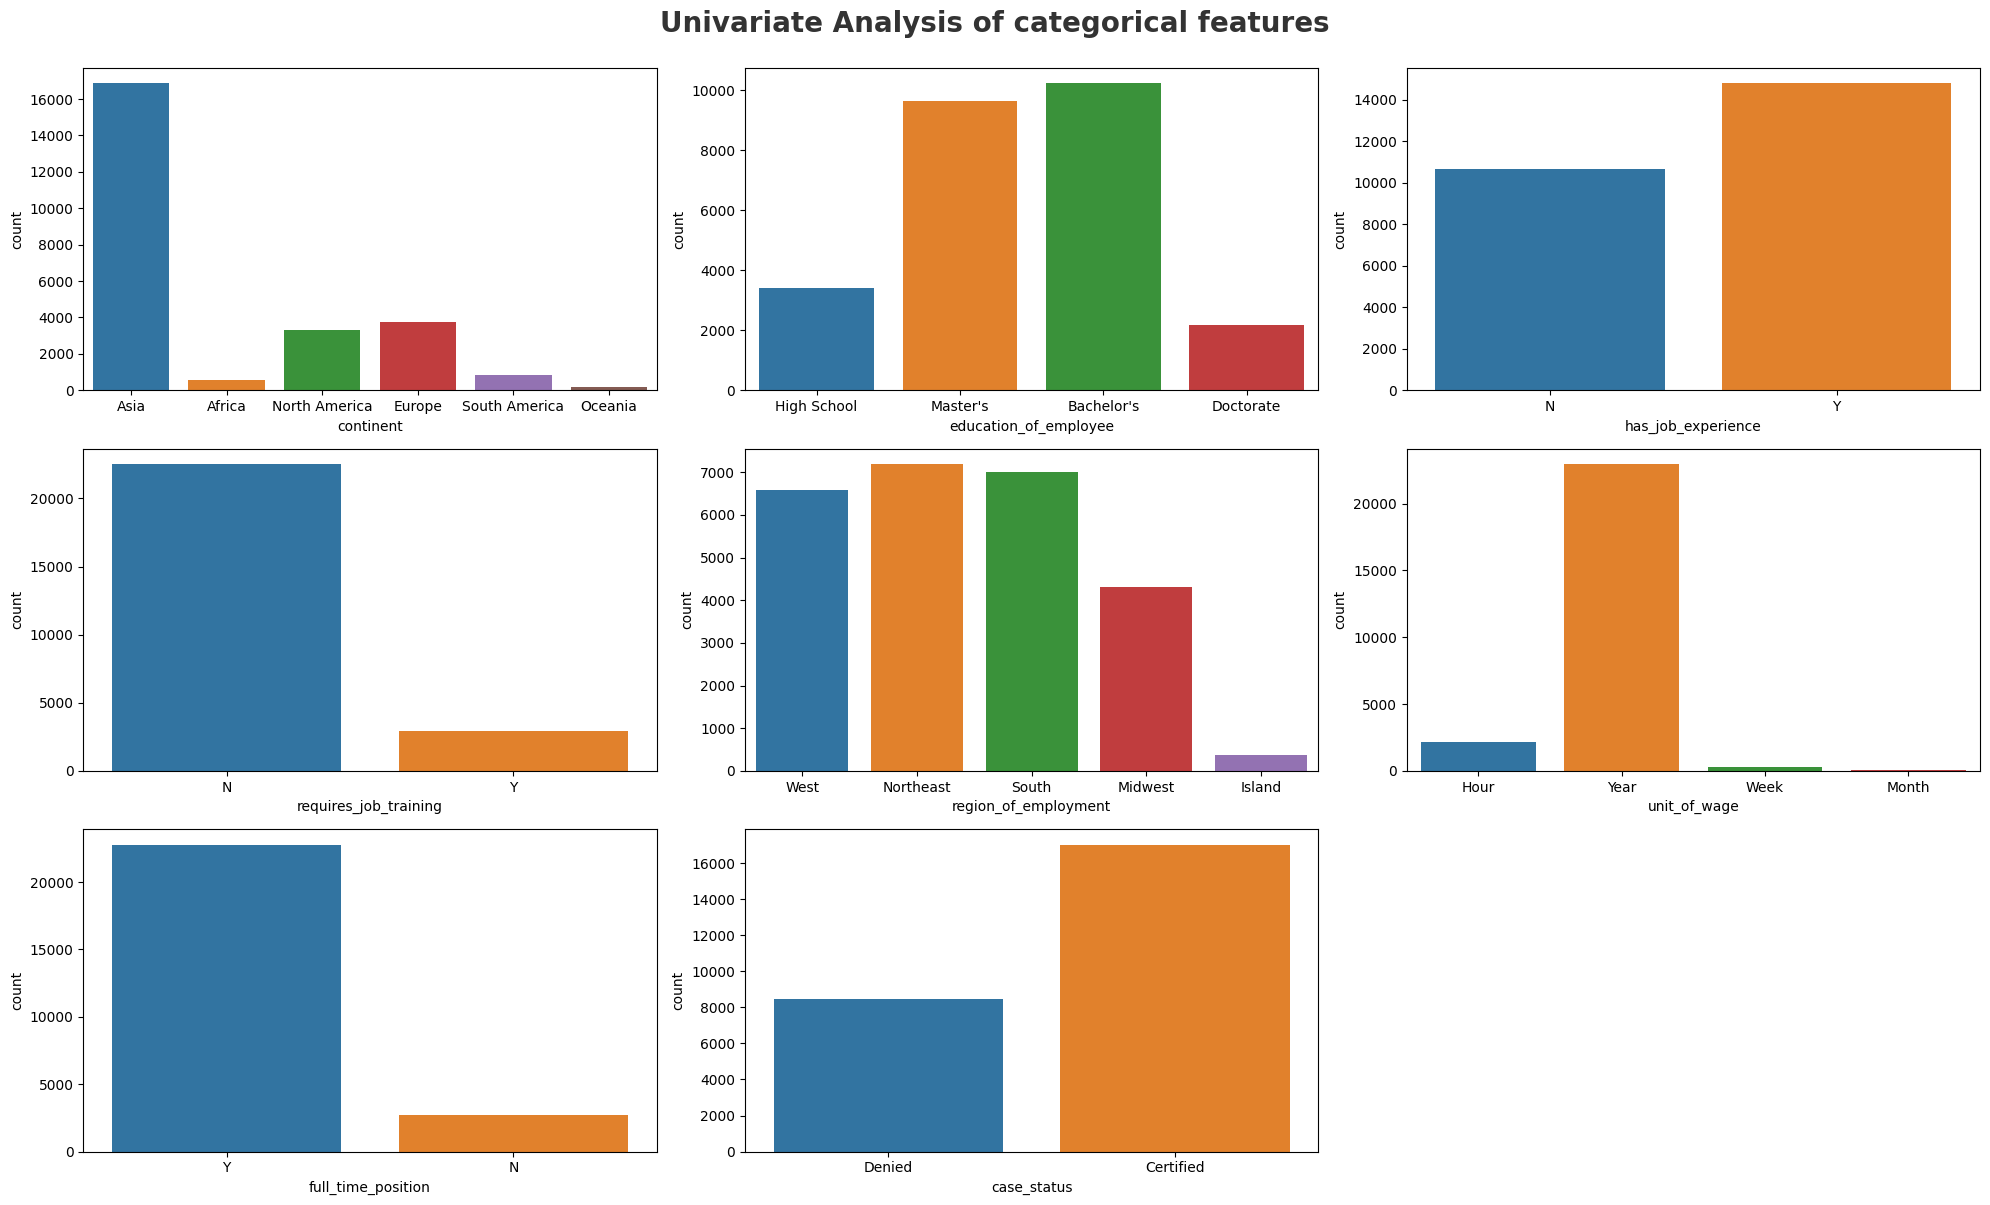

In [17]:
categorical_features.remove('case_id')
plt.figure(figsize=(20,12))
plt.suptitle("Univariate Analysis of categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# plt.savefig("path where to save")

## insights
- **continent, requires_job_training, unit_of_wages, full_time_position** : all these columns are imbalanced data.

# Multivariate Analysis

In [18]:
# checking discrete and continous features

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
continous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}' .format(len(discrete_features), discrete_features))
print('\nWe have {} continous features : {}' .format(len(continous_features), continous_features))

We have 0 discrete features : []

We have 3 continous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [19]:
# checking the colinearity in numerical features
df.iloc[:, 1:].select_dtypes(include=[float, int]).corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


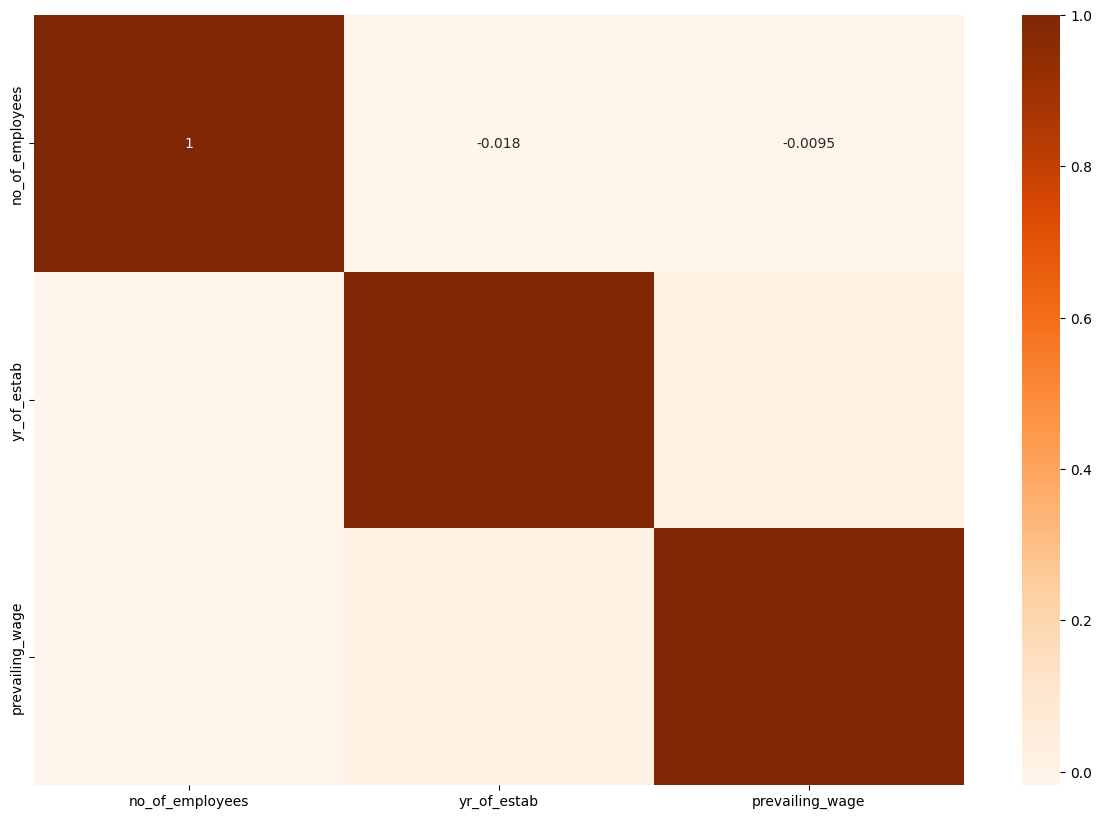

In [20]:
# heatmap
df1=df.copy()
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:, 1:].select_dtypes(include=[float, int]).corr(), cmap='Oranges', annot=True)
plt.show()

In [21]:
# multicolinearity in categorical features using chi-sq test
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject the Null Hypothesis")
    
    else:
        chi2_test.append("Failed to reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypotheis Result']
result

,Column,Hypotheis Result
0,continent,Reject the Null Hypothesis
1,education_of_employee,Reject the Null Hypothesis
2,has_job_experience,Reject the Null Hypothesis
3,requires_job_training,Failed to reject Null Hypothesis
4,region_of_employment,Reject the Null Hypothesis
5,unit_of_wage,Reject the Null Hypothesis
6,full_time_position,Reject the Null Hypothesis
7,case_status,Reject the Null Hypothesis


## insights
- **requires_job_training** : data doesnot have colinearity with the target variable.

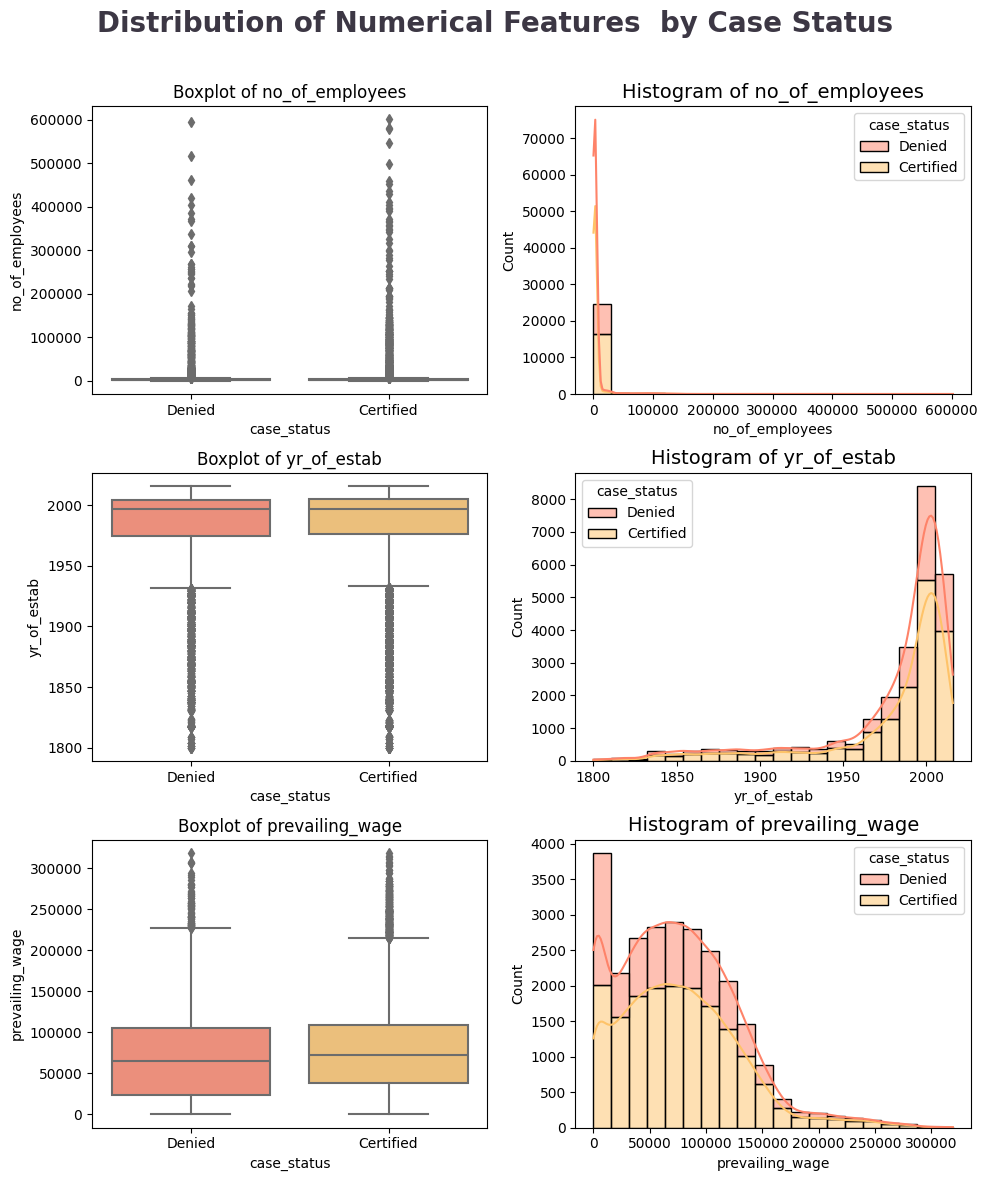

In [22]:
# Distribution of numerical features
clr1= ['#fe8369','#fec369']
fig, ax = plt.subplots(3,2, figsize=(10, 12))
fig.suptitle('Distribution of Numerical Features  by Case Status', color='#3C3744',
            fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

## insights
- All three columns are having outliers on upper and lower bound as well as all are right and left skewed.

# Visualize the target features

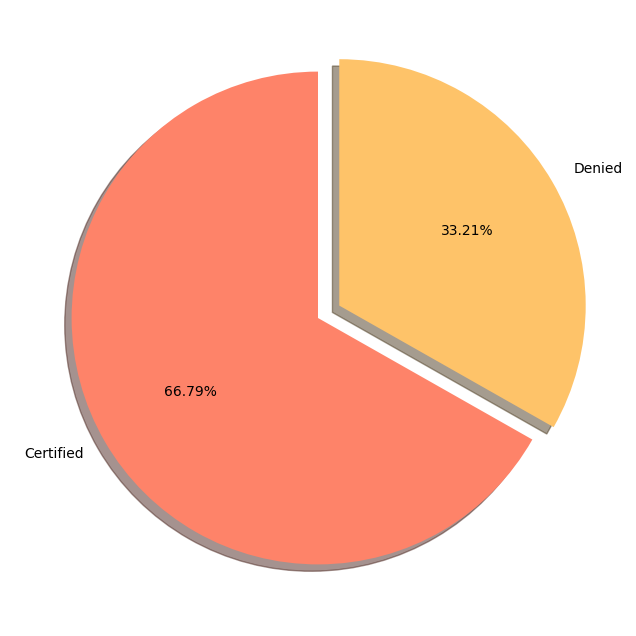

In [23]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ['Certified', 'Denied']

# put piechart with plotly library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ['#fe8369','#fec369']
ax.pie(percentage, labels=labels, startangle = 90, autopct='%1.2f%%',
      explode=explode, shadow=True, colors=colors)
plt.show()

In [24]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [25]:
df2 = df.copy()
df2.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Hypothesis Questions

### Does applicant continent has any impact on vias status?

In [26]:
# groupby data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

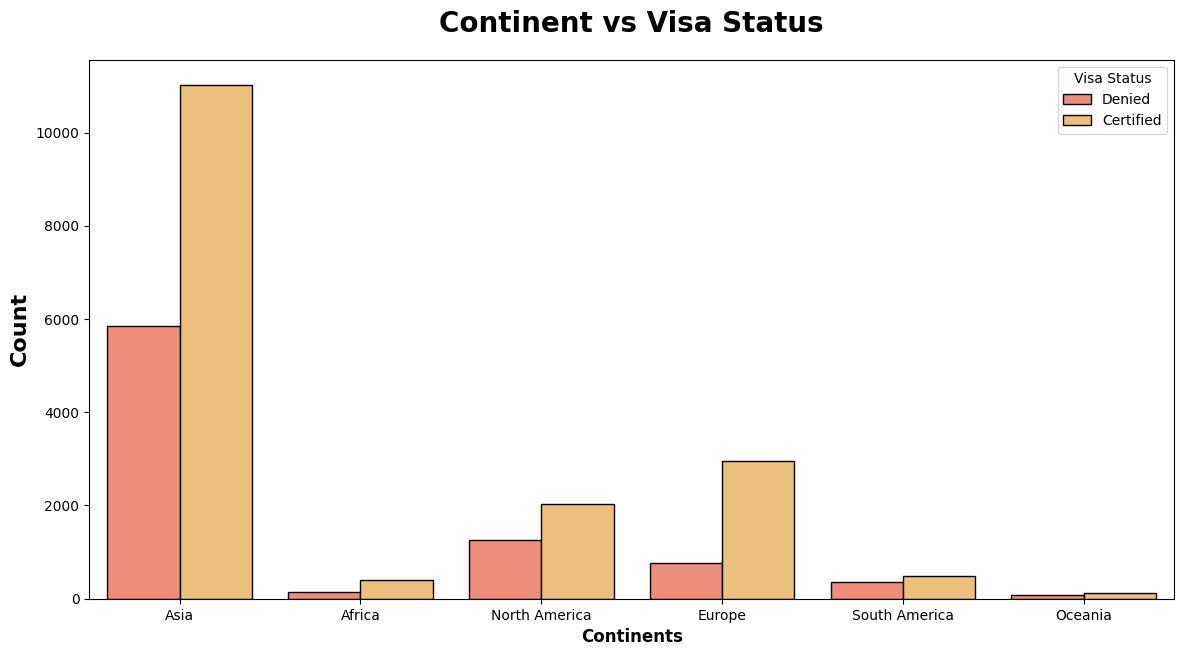

In [27]:
# visualizing the continent vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='continent', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Continents", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

### insights
- **Asia** continent has highest no. of certified and denied visa as compared to others.

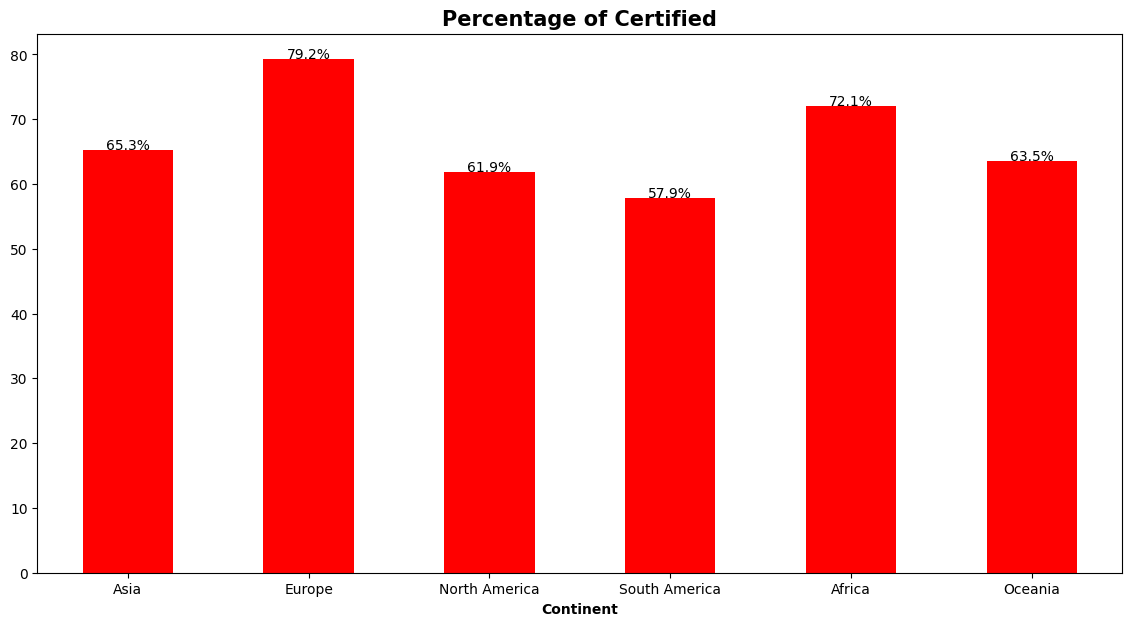

In [28]:
# checking how much percentage of visa gets certified in all continents
plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- **Europe** with 79.2% has the highest no. of certified visa applicants.

### Does applicant education has any impact on visa status?

In [29]:
# groupby data by education_of_employee and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

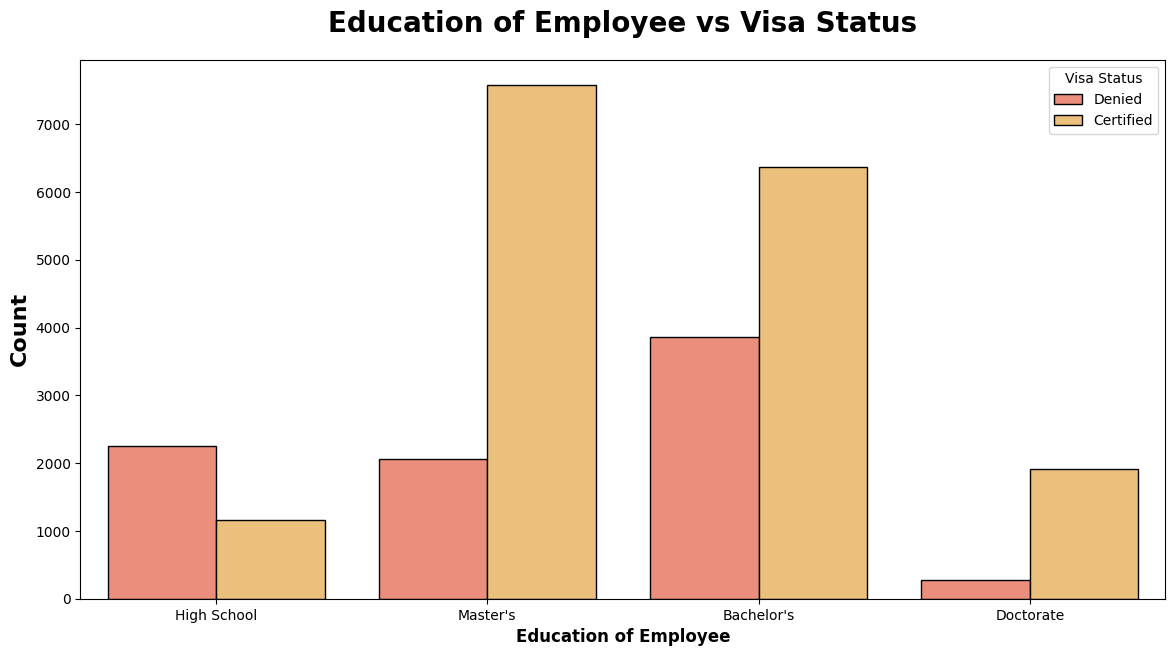

In [30]:
# visualizing the education_of_employee vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='education_of_employee', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("Education of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Education of Employee", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

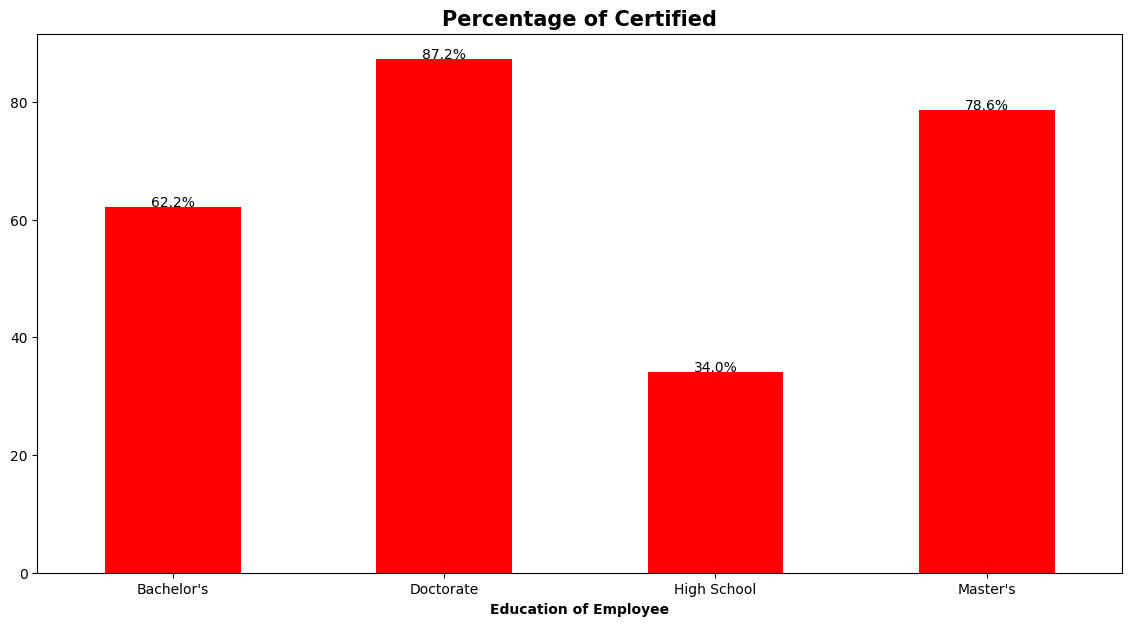

In [58]:
# checking how much percentage of visa gets certified in all continents
plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Education of Employee', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- Applicants with 87.2% as **Docorate** are the highest visa applicants.

### Does applicant job experience has any impact on Visa status?

In [32]:
# groupby data by has_job_experience and their count of case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

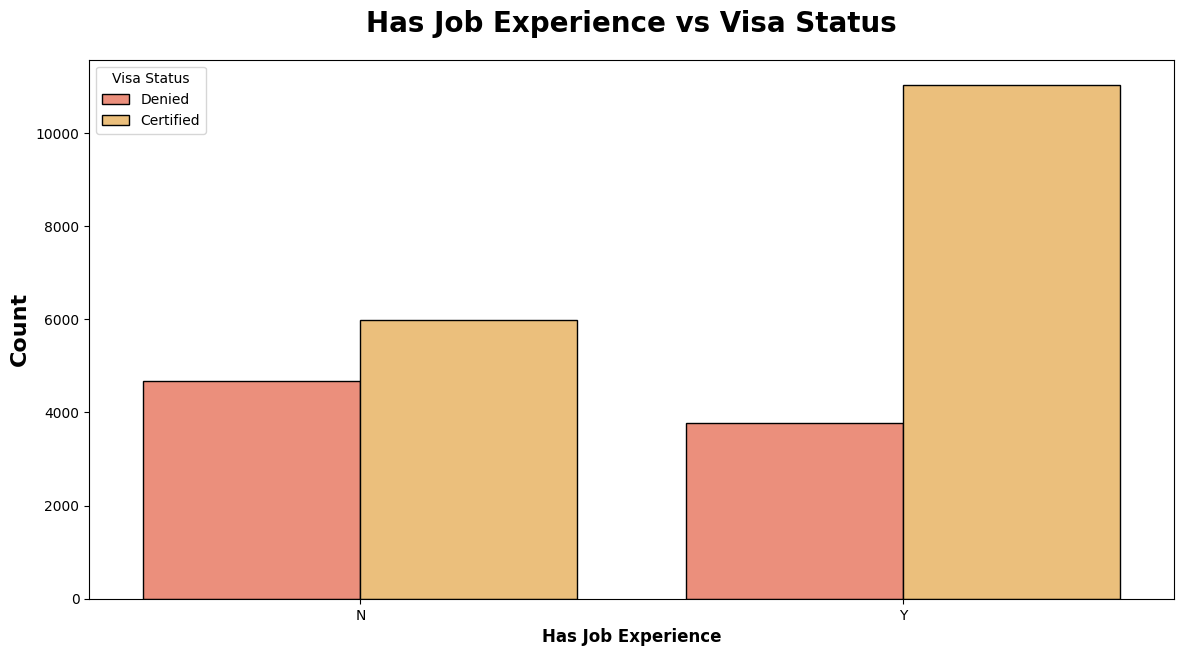

In [33]:
# visualizing the has_job_experience vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='has_job_experience', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("Has Job Experience vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Has Job Experience", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

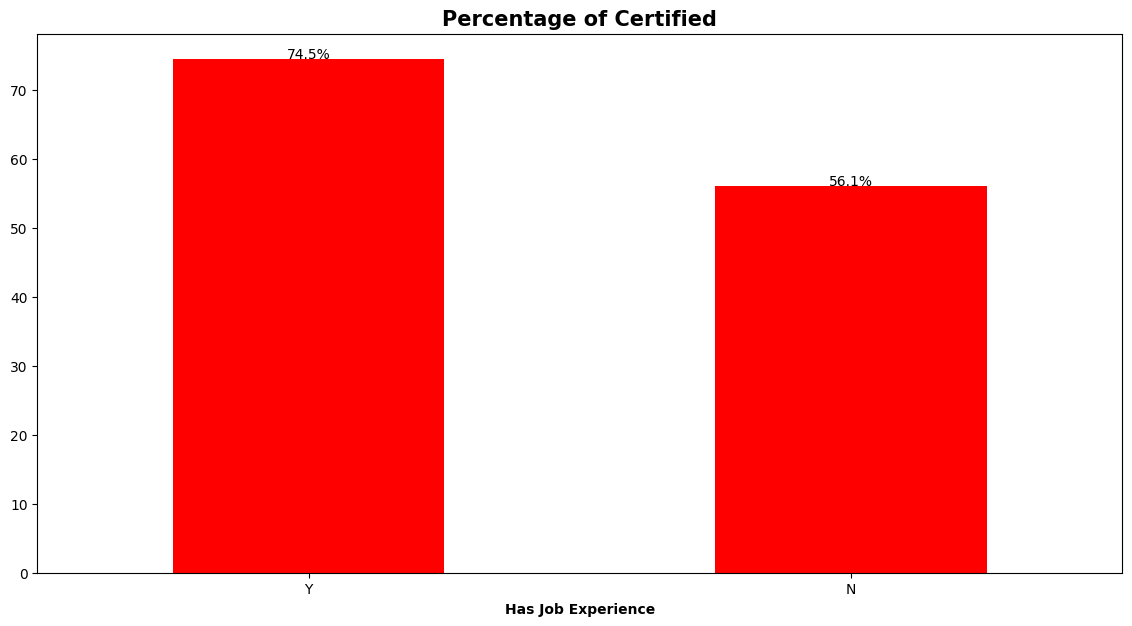

In [34]:
# checking how much percentage of visa gets certified in all continents

plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Has Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- Applicants having prior job experience are the highest with 74.5%.

### If the employee requires job training, does it make any impact on visa status?

In [35]:
# groupby data by requires_job_training and their count of case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

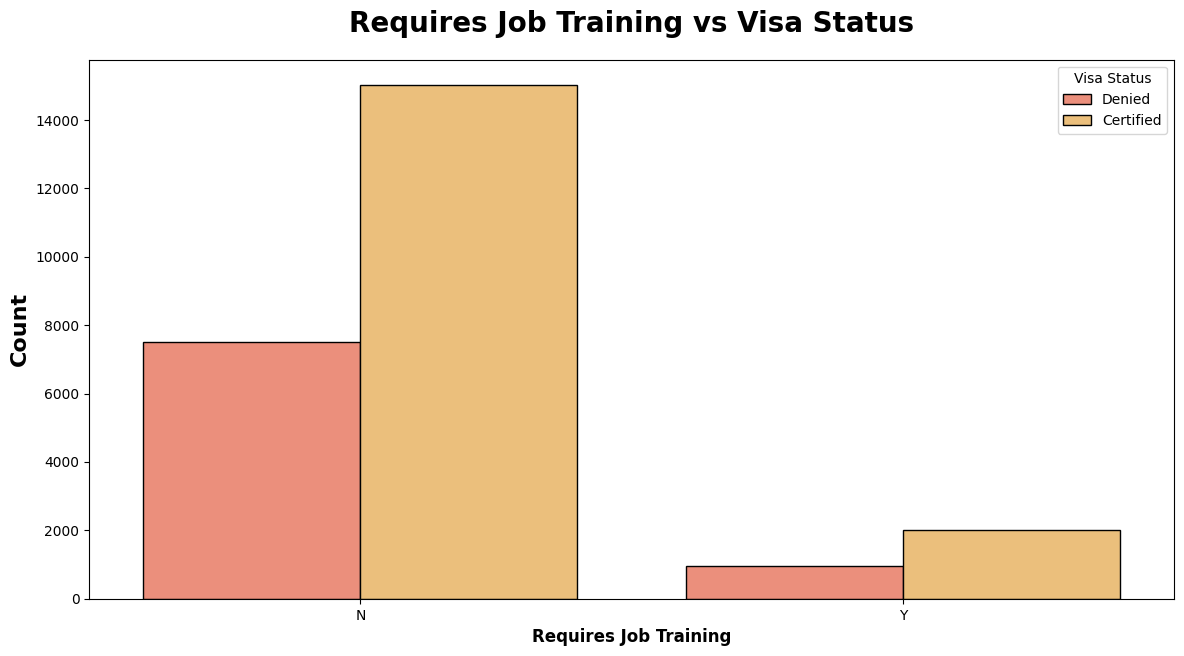

In [36]:
# visualizing the education_of_employee vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='requires_job_training', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("Requires Job Training vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Requires Job Training", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

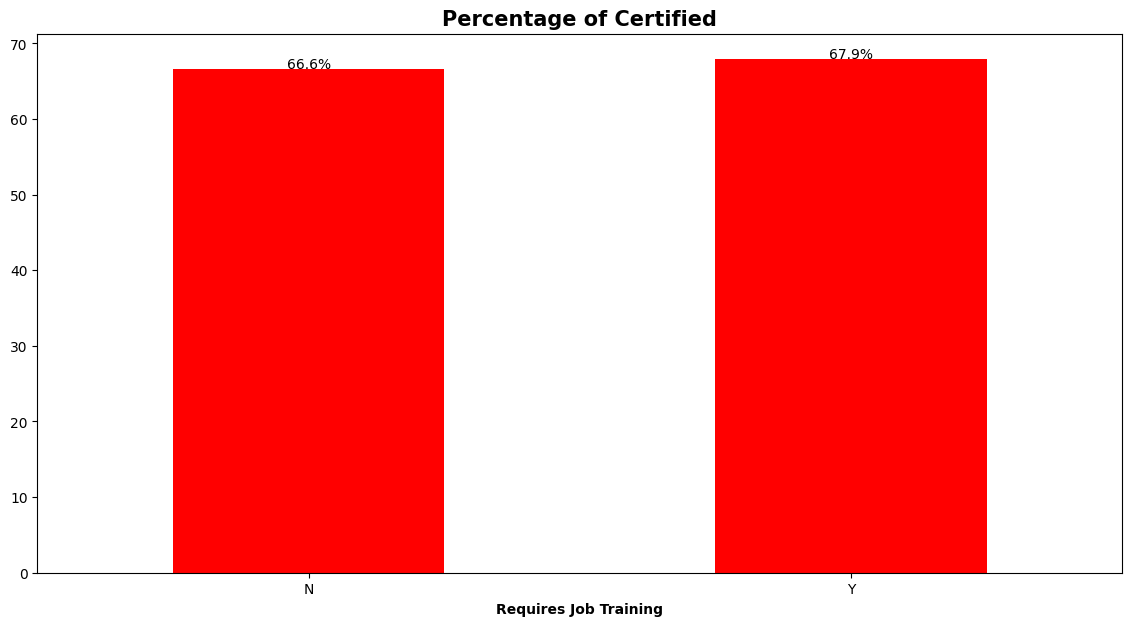

In [37]:
# checking how much percentage of visa gets certified in all continents

plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Requires Job Training', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- requirements of job training has very least impact on visa status.

### Does Number of employee of employer has any impact on Visa status?

In [38]:
# groupby data by no_of_employees and their count of case_status
df.groupby('no_of_employees')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
no_of_employees case_status            
-26             Certified     57.142857
                Denied        42.857143
-25             Certified     80.000000
                Denied        20.000000
-17             Certified     50.000000
...                                 ...
 547172         Certified    100.000000
 579004         Certified    100.000000
 581468         Certified    100.000000
 594472         Denied       100.000000
 602069         Certified    100.000000

[10689 rows x 1 columns]

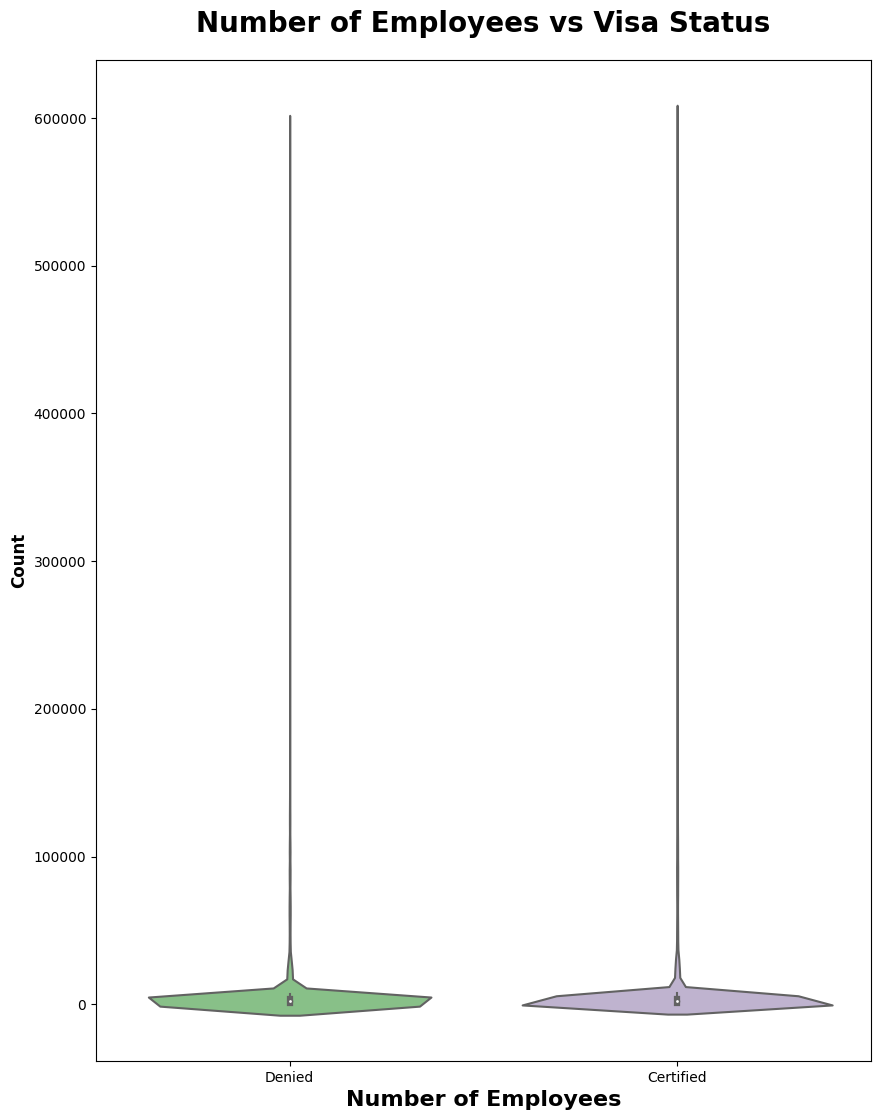

In [60]:
plt.subplots(figsize=(10,13))
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette="Accent")
plt.title("Number of Employees vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Number of Employees", weight="bold", fontsize=16)
plt.ylim()
plt.show()

### insights
- Number of employees on both denied and certified have outliers.

### Does unit of wage has any impact on visa status?

In [40]:
# groupby data by no_of_employees and their count of case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

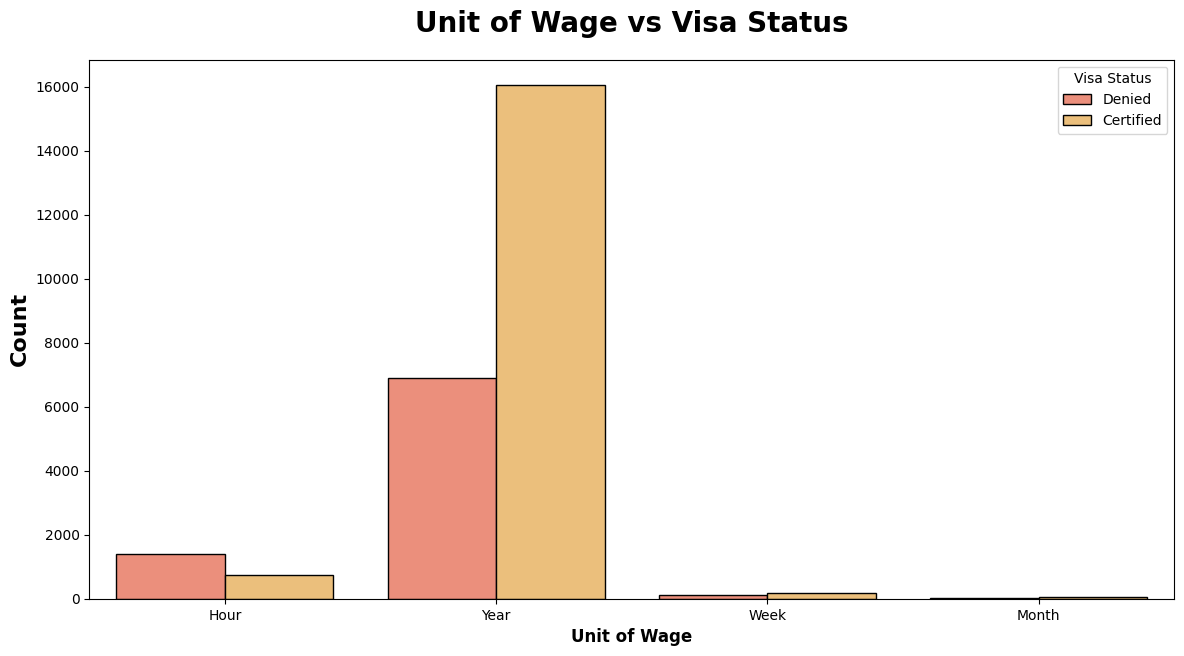

In [62]:
# visualizing the unit_of_wage vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='unit_of_wage', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("Unit of Wage vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Unit of Wage", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

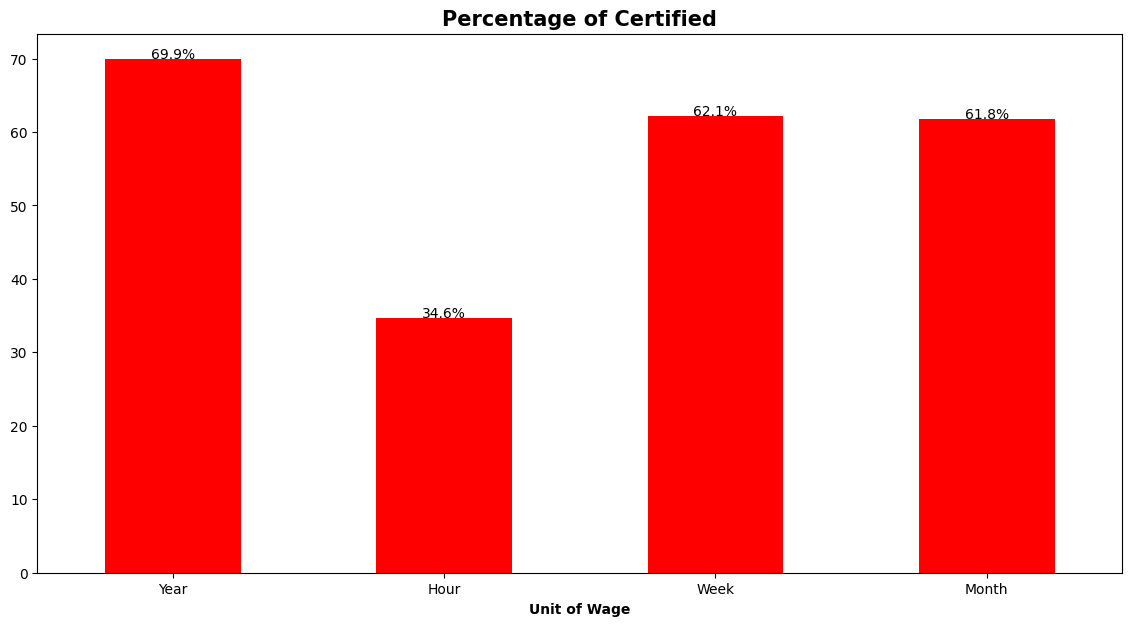

In [61]:
# checking how much percentage of visa gets certified in all continents

plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Unit of Wage', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- applicants having yearly basis work have highest certified visa status.

In [43]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Does employment location has any impact on the visa status?

In [44]:
# groupby data by no_of_employees and their count of case_status
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

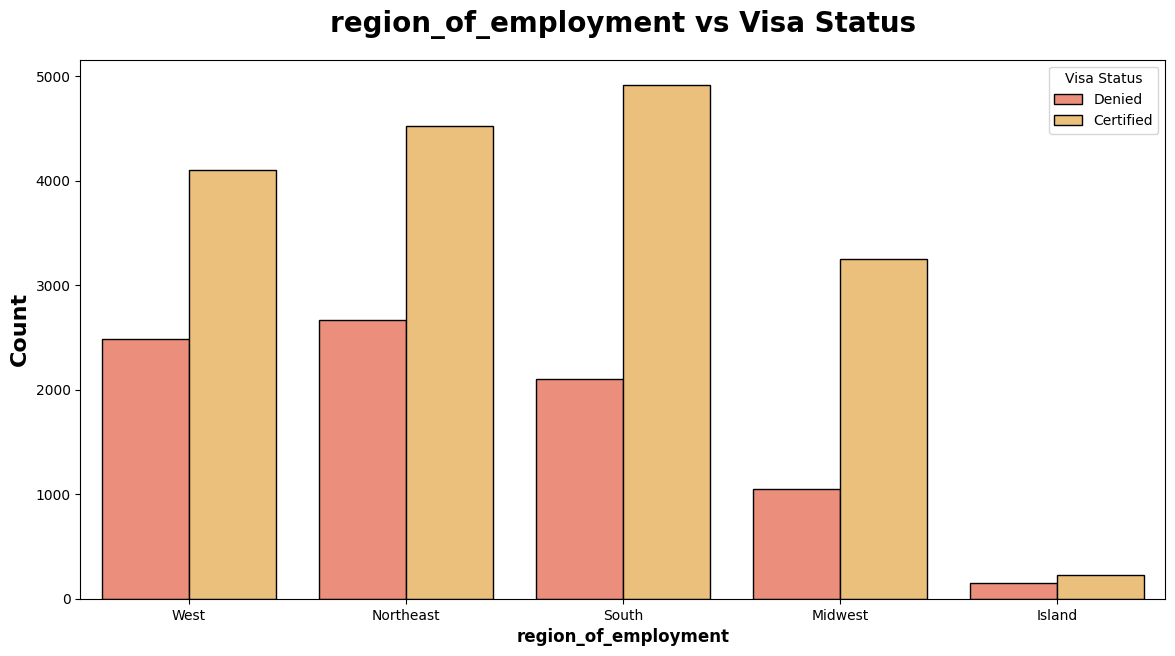

In [45]:
# visualizing the unit_of_wage vs case_status relation
plt.subplots(figsize=(14,7))
sns.countplot(x='region_of_employment', hue='case_status', data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("region_of_employment vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("region_of_employment", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

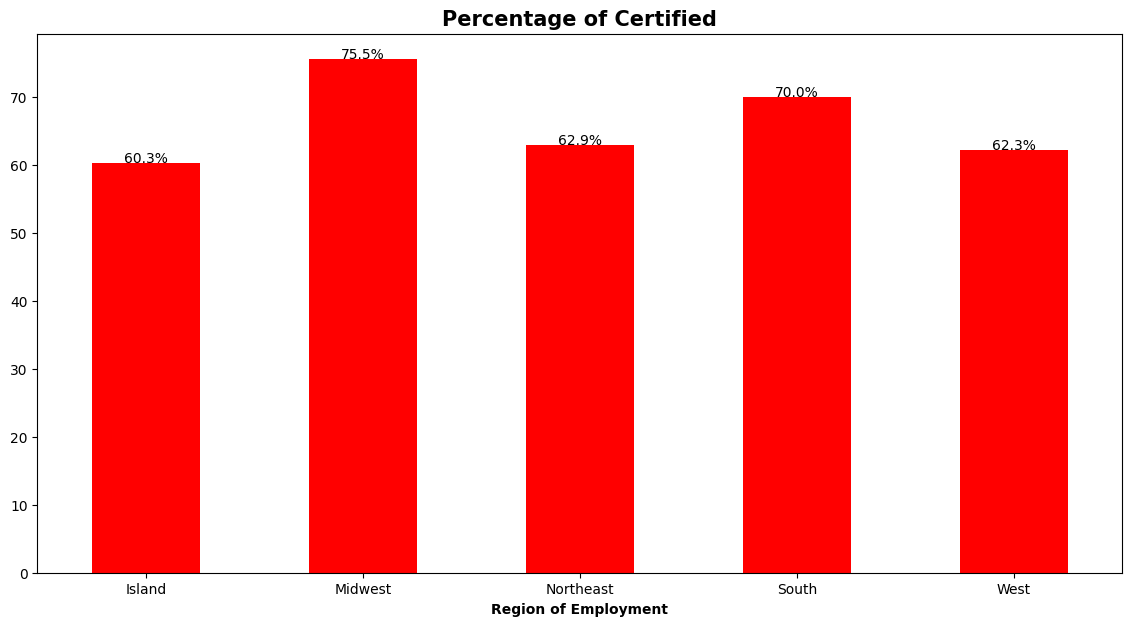

In [63]:
# checking how much percentage of visa gets certified in all continents

plt.figure(figsize=[14,7])

(100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())

for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt,ha='center')

plt.xlabel('Region of Employment', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### insights
- Region such as Island, Northeast and West are having similar result. 
- Region as Midwest is the highest along with South.

### Does prevailing wage has any impact on visa status?

In [47]:
# groupby data by no_of_employees and their count of case_status
df.groupby('prevailing_wage')['case_status'].value_counts(normalize=True).to_frame()*100

,,proportion
prevailing_wage,case_status,
2.1367,Certified,100.0
2.9561,Denied,100.0
3.0031,Denied,100.0
3.3188,Denied,100.0
3.4889,Certified,100.0
...,...,...
311734.4900,Certified,100.0
314156.0600,Certified,100.0
315497.6000,Certified,100.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


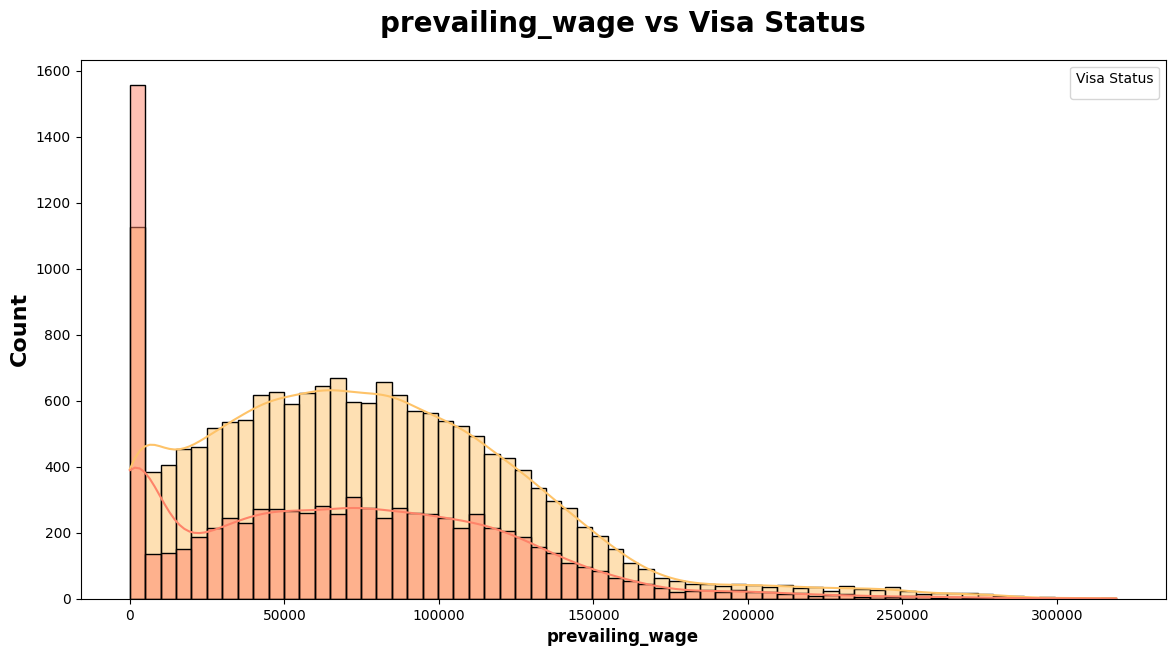

In [48]:
# visualizing the unit_of_wage vs case_status relation
plt.subplots(figsize=(14,7))
sns.histplot(x='prevailing_wage', hue='case_status',kde=True, data=df, ec='black', palette=['#fe8369','#fec369'])
plt.title("prevailing_wage vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("prevailing_wage", weight="bold", fontsize=12)
plt.ylabel("Count", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

### insights
- Prevailing wage distribution is right skewed.

### Prevailing wage based on Education

In [50]:
print("Average Prevailing Wage based on Employee Education")
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Prevailing Wage based on Employee Education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


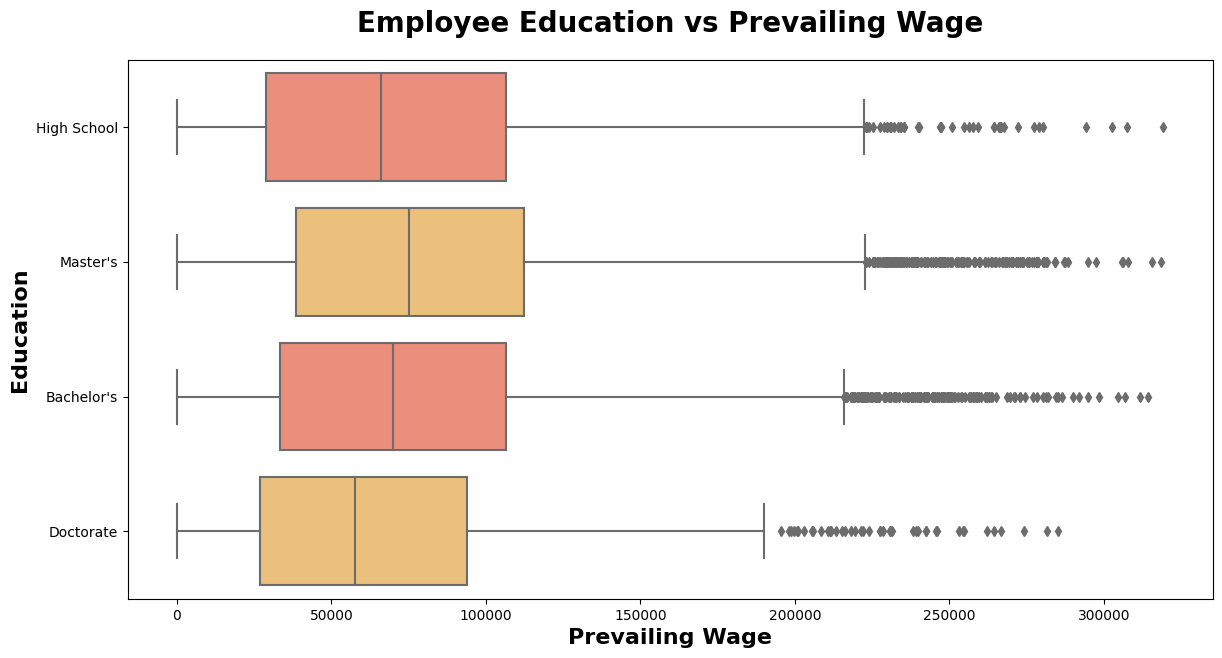

In [51]:
plt.subplots(figsize=(14,7))
sns.boxplot(y='education_of_employee', x='prevailing_wage', data=df, palette=['#fe8369','#fec369'])
plt.title("Employee Education vs Prevailing Wage", weight='bold', fontsize=20, pad=20)
plt.xlabel('Prevailing Wage', weight='bold', fontsize=16)
plt.ylabel('Education', weight='bold', fontsize=16)
plt.show()

### insights
- All the values have outliers in upper bound.

### Prevailing wage based on job experience

In [54]:
print("Average job experience based on Employee Education")
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average job experience based on Employee Education


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


 ### Prevailing wage based on Continent

In [55]:
print("Average Prevailing Wage based on Continent")
df.groupby("continent")["prevailing_wage"].mean().to_frame().sort_values(by='prevailing_wage', ascending=False)

Average Prevailing Wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


### insights
- Applicants from Asia are having highest prevailing wage.

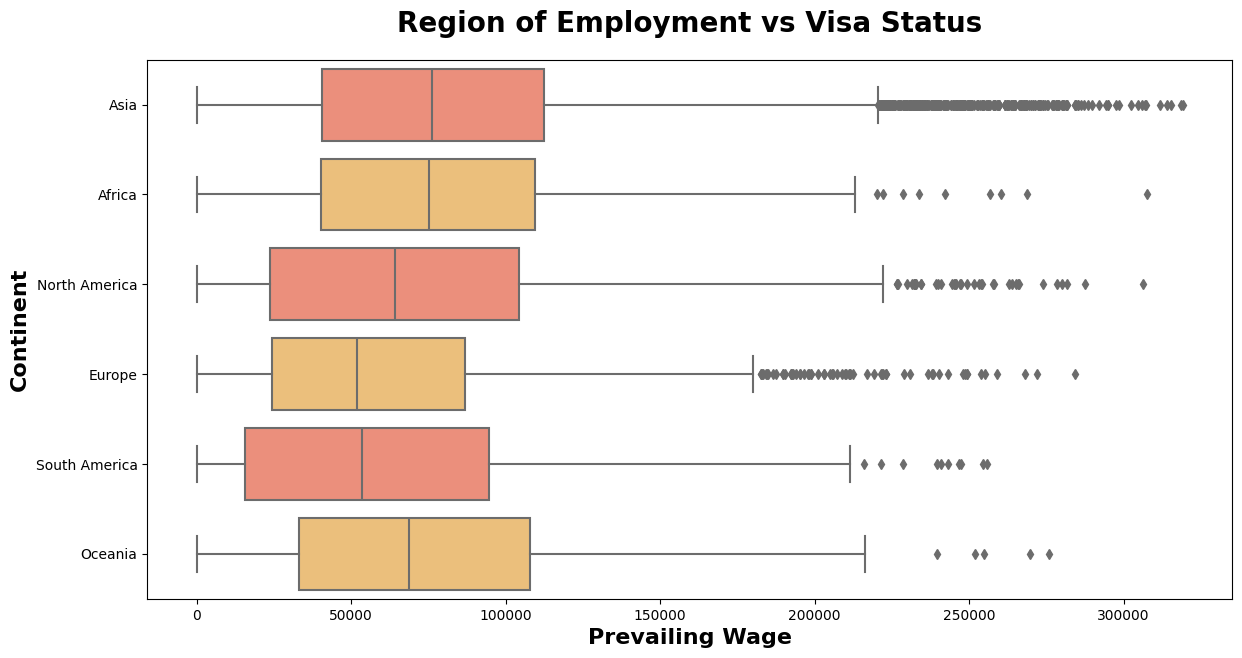

In [57]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent", x="prevailing_wage", data=df, palette=['#fe8369','#fec369'])
plt.title("Region of Employment vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Continent", weight="bold", fontsize=16)
plt.show()

### insights
- All the values are having outliers in upper bound.

### Final Report <br>
- **case_id** : column can be dropped as it is an ID. <br> 
- **requires_job_training** : column can be dropped as it doesn't have much impact on target variable. Proved in visualization and chi2 test. <br> 
- **no_of_employees**, **prevailing_wage** : columns have outlier which should be handled. <br> 
- **continent** : columns has few unique values with very less count, which can be made as others. <br> 
- **case_status** : target column is imbalanced can be handled before model building.